# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.309181e+01     1.311801e+01
 * time: 0.0037331581115722656
     1     6.458323e+01     8.001968e+00
 * time: 0.011130094528198242
     2     5.782961e+01     1.118377e+01
 * time: 0.027814149856567383
     3     4.139973e+01     8.171573e+00
 * time: 0.052262067794799805
     4     2.959633e+01     6.398531e+00
 * time: 0.07829618453979492
     5     1.943175e+01     3.669075e+00
 * time: 0.16614508628845215
     6     1.282522e+01     2.723621e+00
 * time: 0.18295502662658691
     7     1.083414e+01     6.122903e+00
 * time: 0.19683003425598145
     8     9.373628e+00     3.367418e+00
 * time: 0.2154521942138672
     9     8.175735e+00     1.955294e+00
 * time: 0.23363208770751953
    10     7.838793e+00     2.906653e+00
 * time: 0.2486720085144043
    11     7.265285e+00     2.593217e+00
 * time: 0.2633070945739746
    12     6.816847e+00     2.305353e+00
 * time: 0.27762413024902344
    13     6.416843e+00     2.006885e+00
 * tim

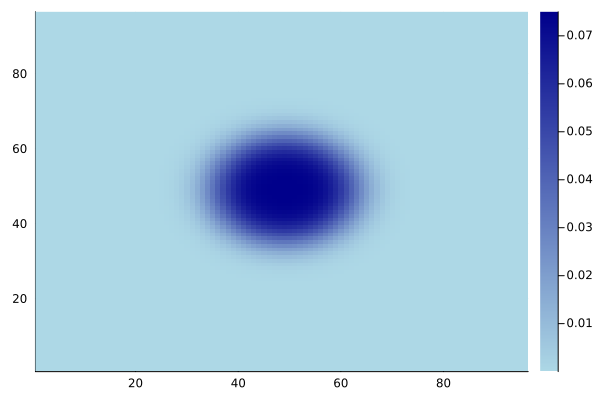

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)